In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import cv2
import sys
import json
import time
import pandas as pd
import numpy as np
from keras.models import load_model
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import io
from PIL import Image
from google.colab.patches import cv2_imshow
from keras.utils import np_utils
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
'''
model_file = drive.CreateFile({'title': 'facial_recognition.h5',
                          'parents':[{'kind': 'drive#fileLink',
                                     'id': '1OuE61gnRypf9cRV7dFSP3zXJmFOO3vC0'}]})
        model_file.Upload()
'''

"\nmodel_file = drive.CreateFile({'title': 'facial_recognition.h5',\n                          'parents':[{'kind': 'drive#fileLink',\n                                     'id': '1OuE61gnRypf9cRV7dFSP3zXJmFOO3vC0'}]})\n        model_file.Upload()\n"

In [ ]:
def get_file(id='id', data_name='data_name'):
  file_id = id
  downloaded = drive.CreateFile({'id': file_id}) 
  return downloaded.GetContentFile(data_name)

In [ ]:
get_file('1Op_TUpxvfSRIy7qb6TPPL23f_Z-mwCPv', 'ResNet-50.h5')

In [ ]:
get_file('1SVBYRc0-9WeUrz61nn6scpHQvrDmYKNx', 'haarcascade_frontalface_default.xml')

In [ ]:
model = load_model("ResNet-50.h5")
















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [ ]:
emotions = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

In [ ]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
def preprocess_input(image):
  img_width, img_height = 197, 197
  image = cv2.resize(image, (img_width, img_height))  # Resizing images for the trained model
  ret = np.empty((img_height, img_width, 3)) 
  ret[:, :, 0] = image
  ret[:, :, 1] = image
  ret[:, :, 2] = image
  x = np.expand_dims(ret, axis = 0)   # (1, XXX, XXX, 3)
  x -= 128.8006   # np.mean(train_dataset)
  x /= 64.6497    # np.std(train_dataset)
  return x

In [ ]:
def predict(emotion):
    # Generates output predictions for the input samples
        # x:    the input data, as a Numpy array (None, None, None, 3)
    prediction = model.predict(emotion)
    
    return prediction

In [ ]:
get_file('1OSPNda_8XR8j7kFrgcblqrMrOtn9i9L2', 'health-benefits-of-smiling-07-pg-full.jpg')

[[1.4484908e-03 5.5029936e-06 8.5517170e-04 9.9571359e-01 7.2444708e-04
  1.7104918e-04 1.0817922e-03]]
Happiness


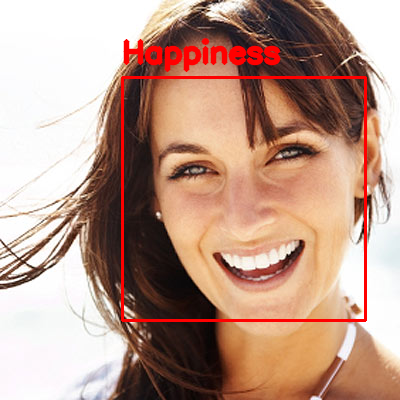

In [ ]:
img = cv2.imread('health-benefits-of-smiling-07-pg-full.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
        img_gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

for (x, y, w, h) in faces:
  face_image_gray = img_gray[y:y+h, x:x+w]
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
  emotion = preprocess_input(img_gray)  
  prediction = predict(emotion)
  print(prediction)
  top_1_prediction = emotions[np.argmax(prediction)]
  print(top_1_prediction)
  cv2.putText(img, top_1_prediction, (x, y-15), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 4, cv2.LINE_AA)
  
  cv2_imshow(img)
  if cv2.waitKey(0) == 27:
    break

cv2.destroyAllWindows()

In [ ]:
def Update_csv(csv_path, emotion):
  df = pd.read_csv(csv_path)
  new_df = pd.DataFrame()
  df = df.append()